In [1]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [5, 5]
matplotlib.rcParams['figure.dpi'] = 200

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

from data_helper_triangle import TriangleLabeledDataset,image_names
from helper import collate_fn, draw_box

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

random.seed(0)
np.random.seed(0)
torch.manual_seed(0);

%load_ext autoreload
%autoreload 2

# All the images are saved in image_folder
# All the labels are saved in the annotation_csv file
image_folder = 'data'
annotation_csv = 'data/annotation.csv'

labeled_scene_index = np.arange(106, 134)
image_names

['CAM_FRONT.jpeg',
 'CAM_FRONT_LEFT.jpeg',
 'CAM_BACK_LEFT.jpeg',
 'CAM_BACK.jpeg',
 'CAM_BACK_RIGHT.jpeg',
 'CAM_FRONT_RIGHT.jpeg']

In [2]:
transform = torchvision.transforms.ToTensor()
# The labeled dataset can only be retrieved by sample.
# And all the returned data are tuple of tensors, since bounding boxes may have different size
# You can choose whether the loader returns the extra_info. It is optional. You don't have to use it.
labeled_trainset = TriangleLabeledDataset(image_folder=image_folder,
                                  annotation_file=annotation_csv,
                                  scene_index=labeled_scene_index,
                                  transform=transform,
                                  extra_info=True,
                                    camera = 'CAM_FRONT.jpeg'
                                 )

In [3]:
trainloader = torch.utils.data.DataLoader(labeled_trainset , batch_size=100, shuffle=False, num_workers=2, collate_fn=collate_fn)

In [4]:
sample, target, road_image, extra = iter(trainloader).next()

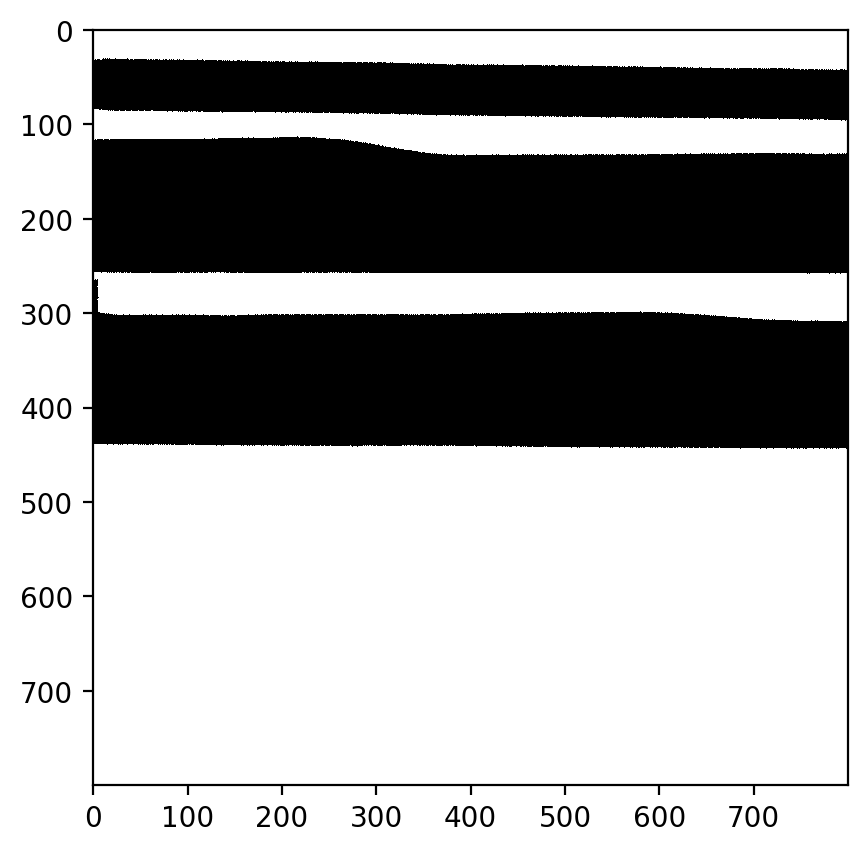

In [7]:
fig, ax = plt.subplots()

ax.imshow(road_image[99], cmap='binary');